In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_excel("lapdata.xlsx")

In [3]:
df.head()

,Product,Processor,Ram,Memory,OS,Size,Price
0,MSI Stealth GS77 12UHS-226IN,12th Gen Core i9,32 GB DDR5 RAM,2 TB SSD,Windows 11 OS,17.3 inches,"3,00,990"
1,MSI Titan GT77 HX 13VI-092IN,13th Gen Intel Core i9 13980HX,64 GB DDR5 RAM,4 TB SSD,Windows 11 OS,17.3 inches,"5,99,990"
2,Acer Predator Helios 500 Ph517-52,11th Gen Intel Core i9 11980HK,64 GB DDR4 RAM,2 TB SSD,Windows 10 OS,17.3 inches,"4,42,605"
3,MSI Titan GT77 HX 13VH-093IN,13th Gen Intel Core i9 13980HX,64 GB DDR5 RAM,2 TB SSD,Windows 11 OS,17.3 inches,"4,89,990"
4,MSI Stealth GS66 12UGS-290IN,12th Gen Intel Core i7 12700H,32 GB DDR5 RAM,1 TB SSD,Windows 11 OS,15.6 inches,"1,95,990"


# Data Dictionary
1. Product--> product name attribute represents the unique name or model of each laptop.
2. Processor--> The processor attribute specifies the central processing unit (CPU) of the laptop.
3. Ram--> It indicates the amount of temporary memory available to the laptop for running applications and processes.
4. Memory--> The memory attribute refers to the laptop's storage capacity, typically represented by the hard disk drive (HDD) or SSD.
5. OS--> Operating system.
6. Size--> Display size.
7. Price--> Price of laptop in rupees(Rs.)

In [4]:
df.shape

(49, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    49 non-null     object
 1   Processor  49 non-null     object
 2   Ram        49 non-null     object
 3   Memory     49 non-null     object
 4   OS         49 non-null     object
 5   Size       49 non-null     object
 6   Price      49 non-null     object
dtypes: object(7)
memory usage: 2.8+ KB


Price is not in correct format.

In [6]:
df.isnull().sum()

Product      0
Processor    0
Ram          0
Memory       0
OS           0
Size         0
Price        0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

Data is cleaned. 

In [9]:
# converting ,(comma) from Price to blank space

Price=[]

for i in df['Price']:
    i=str(i)
    if ',' in i:
        Price.append(int(i.replace(',','')))
    else :
        Price.append(int(i))
        
        
df['Price']=Price

# Feature extraction
* We can extract important information from the exisiting features.

In [10]:
def extract(df,col,element,name):
    ls=[]
    for i in df[col]:
        ls.append(i.split(' ')[element])
    df[name]=ls
    
    return df

In [11]:
df=extract(df,'Product',0,'Company') # extracting company name from Product
df=extract(df,'Product',1,'Series')

In [12]:
df=extract(df,'Processor',2,'Processor_company') 

In [13]:
df=extract(df,'Ram',0,'Ram_size')
df=extract(df,'Ram',1,'Ram_type')

In [14]:
df.head()

,Product,Processor,Ram,Memory,OS,Size,Price,Company,Series,Processor_company,Ram_size,Ram_type
0,MSI Stealth GS77 12UHS-226IN,12th Gen Core i9,32 GB DDR5 RAM,2 TB SSD,Windows 11 OS,17.3 inches,300990,MSI,Stealth,Core,32 GB,DDR5
1,MSI Titan GT77 HX 13VI-092IN,13th Gen Intel Core i9 13980HX,64 GB DDR5 RAM,4 TB SSD,Windows 11 OS,17.3 inches,599990,MSI,Titan,Intel,64 GB,DDR5
2,Acer Predator Helios 500 Ph517-52,11th Gen Intel Core i9 11980HK,64 GB DDR4 RAM,2 TB SSD,Windows 10 OS,17.3 inches,442605,Acer,Predator,Intel,64 GB,DDR4
3,MSI Titan GT77 HX 13VH-093IN,13th Gen Intel Core i9 13980HX,64 GB DDR5 RAM,2 TB SSD,Windows 11 OS,17.3 inches,489990,MSI,Titan,Intel,64 GB,DDR5
4,MSI Stealth GS66 12UGS-290IN,12th Gen Intel Core i7 12700H,32 GB DDR5 RAM,1 TB SSD,Windows 11 OS,15.6 inches,195990,MSI,Stealth,Intel,32 GB,DDR5


In [15]:
#removing unnessasory columns
df.drop(['Product','Ram'],axis=1,inplace=True)

# EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Company', ylabel='count'>

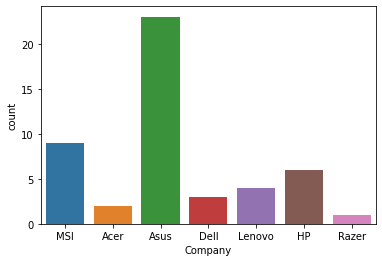

In [16]:
sns.countplot(df['Company'])

<AxesSubplot:>

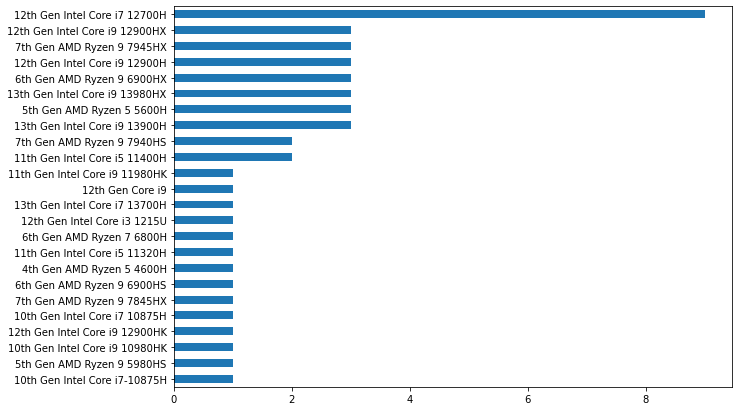

In [17]:
plt.figure(figsize=(10,7))
df['Processor'].value_counts().sort_values(ascending=True).plot(kind='barh')

12th Gen Intel Core i7 12700H processor is being used in gaming laptops these days.

In [18]:
df['Size'].value_counts()

15.6 inches    13
16 inches      13
17.3 inches    11
14 inches       3
16.1 inches     3
17 inches       2
13.4 inches     2
15.6 inches     1
Name: Size, dtype: int64

In [19]:
df['Memory'].value_counts()

1 TB SSD      21
2 TB SSD      15
512 GB SSD    11
4 TB SSD       1
Name: Memory, dtype: int64

* All gaming laptops have SSD only.
* 1Tb size is prefered one.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OS ', ylabel='count'>

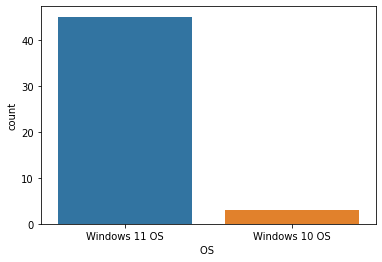

In [20]:
sns.countplot(df['OS '])

* Most of the laptops have latest OS.

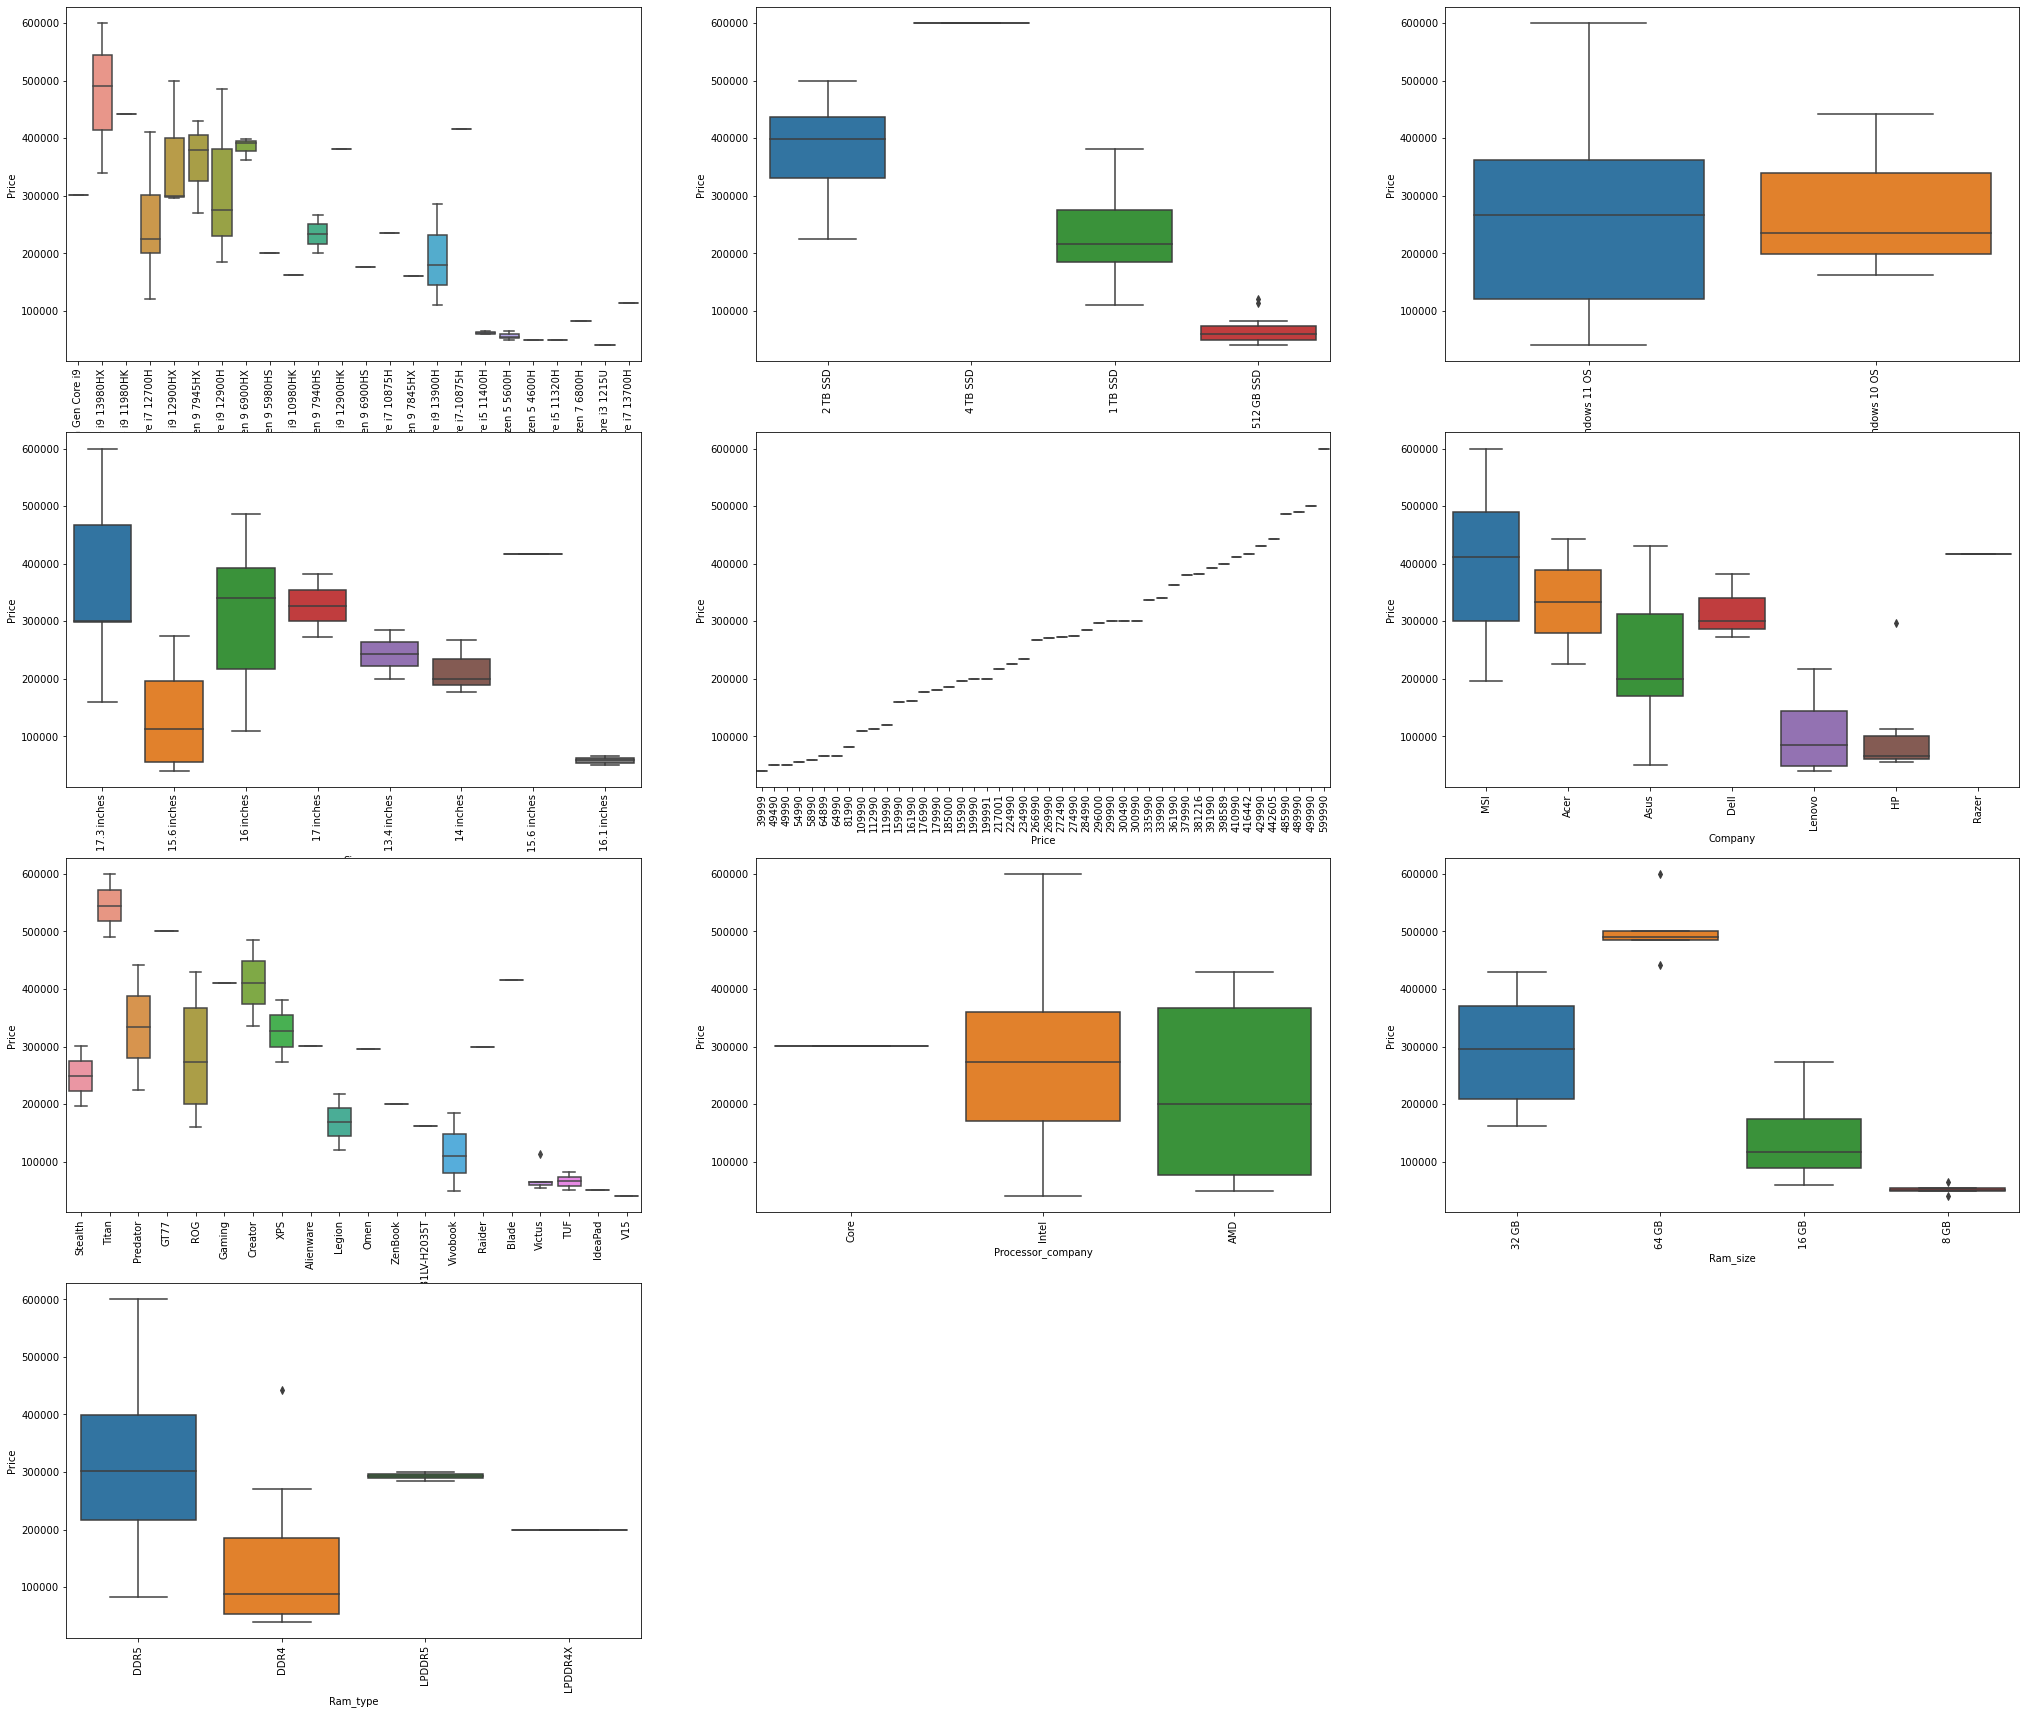

In [21]:
x=1
plt.figure(figsize=(35,30))
for i in df.columns:
    plt.subplot(4,3,x)
    sns.boxplot(x=df[i],y=df.Price)
    plt.xticks(rotation=90)
    x+=1

### Insights:
* Intel processors are expensive than AMD.
* DDR5 ram type is expensive.
* Asus and MSI are available in large price range, where Asus focuses on middle range laptop and MSI focuses on high range laptop.
* DDR5 RAM type is most preferred one. 

In [22]:
df_copy=df.copy() 

## Data Spitting

In [23]:
# defining x and y

x= df_copy.drop('Price',axis=1)
y= df_copy['Price']

In [24]:
x=pd.get_dummies(x)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

### Model Building

In [30]:
def run_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("\n Mean square error:\t",mean_squared_error(y_test,y_pred))
    print("\n Mean absolute error:\t",mean_absolute_error(y_test,y_pred))
    print("\n r2 score:\t",r2_score(y_test,y_pred))
    print("\n Root mean square error:\t",np.sqrt(mean_squared_error(y_test,y_pred)))

In [31]:
lr=LinearRegression()
run_model(lr)


 Mean square error:	 3947909591.1510043

 Mean absolute error:	 54402.520330582316

 r2 score:	 0.729767879961151

 Root mean square error:	 62832.39284915866


In [33]:
dtr=DecisionTreeRegressor()

run_model(dtr)


 Mean square error:	 7766147371.583333

 Mean absolute error:	 77718.58333333333

 r2 score:	 0.4684117201009057

 Root mean square error:	 88125.74749517495


In [34]:
rfr=RandomForestRegressor()
run_model(rfr)


 Mean square error:	 5199961508.3680935

 Mean absolute error:	 62181.3876904762

 r2 score:	 0.6440656529530507

 Root mean square error:	 72110.75861733874


In [35]:
ada=AdaBoostRegressor()
run_model(ada)


 Mean square error:	 4879384593.870097

 Mean absolute error:	 56858.9287004662

 r2 score:	 0.6660089566787699

 Root mean square error:	 69852.59189085325


In [36]:
gbr=GradientBoostingRegressor()
run_model(gbr)


 Mean square error:	 5493374209.447849

 Mean absolute error:	 63478.778117922215

 r2 score:	 0.6239817238689527

 Root mean square error:	 74117.30033836803


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# criterion
criteria = [ 'gini','entropy']

In [39]:
param_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':criteria}

print(param_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'criterion': ['gini', 'entropy']}


In [40]:
gs_cv=GridSearchCV(dtr,param_grid=param_grid,cv = 3, verbose=2, n_jobs = 4)

In [43]:
from keras.layers import Dense,Dropout,BatchNormalization
from keras.models import Sequential 
from keras.callbacks import EarlyStopping

In [44]:
nn=Sequential()

#1st layer/ input layer 
nn.add(Dense(128,activation='relu',input_dim=x_train.shape[1]))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

#2ns layer
nn.add(Dense(64,activation='relu'))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

#o/p layer
nn.add(Dense(1,activation='linear'))

In [45]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9856      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [46]:
nn.compile(loss='mae',optimizer='adam',metrics='mse')

In [47]:
Early_stopping=EarlyStopping(monitor='val_loss',patience=10)

In [48]:
hist=nn.fit(x_train,y_train,validation_split=0.2,callbacks=Early_stopping,epochs=100,batch_size=8)

Epoch 1/100
4/4 [==============================] - 2s 59ms/step - loss: 263618.7500 - mse: 93663772672.0000 - val_loss: 199866.4062 - val_mse: 51560677376.0000
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 263618.6875 - mse: 93663633408.0000 - val_loss: 199866.3750 - val_mse: 51560660992.0000
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 263618.6562 - mse: 93663535104.0000 - val_loss: 199866.3281 - val_mse: 51560652800.0000
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 263618.5938 - mse: 93663567872.0000 - val_loss: 199866.2969 - val_mse: 51560632320.0000
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 263618.5312 - mse: 93663592448.0000 - val_loss: 199866.2500 - val_mse: 51560620032.0000
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 263618.5000 - mse: 93663510528.0000 - val_loss: 199866.2188 - val_mse: 51560603648.0000
Epoch 7/100
4/4 [============================

4/4 [==============================] - 0s 8ms/step - loss: 263611.0000 - mse: 93659373568.0000 - val_loss: 199859.3125 - val_mse: 51557810176.0000
Epoch 53/100
4/4 [==============================] - 0s 8ms/step - loss: 263610.7188 - mse: 93658865664.0000 - val_loss: 199859.0469 - val_mse: 51557703680.0000
Epoch 54/100
4/4 [==============================] - 0s 7ms/step - loss: 263610.4375 - mse: 93659209728.0000 - val_loss: 199858.7969 - val_mse: 51557597184.0000
Epoch 55/100
4/4 [==============================] - 0s 8ms/step - loss: 263610.0938 - mse: 93658767360.0000 - val_loss: 199858.5312 - val_mse: 51557498880.0000
Epoch 56/100
4/4 [==============================] - 0s 8ms/step - loss: 263609.8125 - mse: 93658734592.0000 - val_loss: 199858.2812 - val_mse: 51557392384.0000
Epoch 57/100
4/4 [==============================] - 0s 8ms/step - loss: 263609.5000 - mse: 93658636288.0000 - val_loss: 199858.0000 - val_mse: 51557269504.0000
Epoch 58/100
4/4 [==============================] - 0

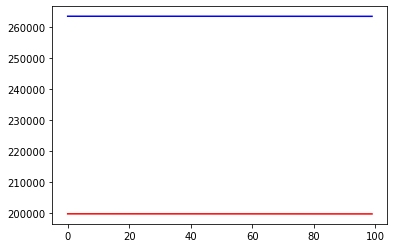

In [134]:
plt.plot(hist.history['loss'],c='blue')
plt.plot(hist.history['val_loss'],c='red')

In [135]:
y_=nn.predict(x_test)

1/1 [==============================] - 0s 59ms/step


In [138]:
y_.flatten()

array([24.780725, 28.88262 , 27.595877, 25.160454, 27.201563, 33.36528 ,
       26.702208, 29.249731, 27.461752, 29.788794, 25.204052, 29.130766],
      dtype=float32)